# PE4MOVE Data Exploration & Visualization

This notebook provides comprehensive exploratory data analysis (EDA) and visualization of the PE4MOVE intervention study. The data has been cleaned with the following preprocessing:
- Participants filtered to include only those with complete T1 (follow-up) data
- Value 8 ("prefer not to say") replaced with NaN for score-based variables
- Derived motivation and self-monitoring scores calculated

We'll analyze both the intervention and control groups to understand:

1. **Dataset Overview**: Basic statistics and data quality
2. **Demographics**: Age and sex distributions
3. **Physical Activity Patterns**: MVPA frequency, leisure activities, sedentary behavior
4. **Intervention Effects**: Comparing changes between groups from T0 to T1
5. **Correlations**: Relationships between variables
6. **Missing Data Patterns**: Understanding data completeness

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries loaded successfully")

✓ Libraries loaded successfully


In [2]:
# Load the cleaned datasets
df_intervention = pd.read_csv('data/intervention_group_clean.csv')
df_control = pd.read_csv('data/control_group_clean.csv')

print("Dataset Loaded:")
print(f"  Intervention Group: {df_intervention.shape[0]} participants, {df_intervention.shape[1]} variables")
print(f"  Control Group: {df_control.shape[0]} participants, {df_control.shape[1]} variables")
print(f"  Total Participants: {df_intervention.shape[0] + df_control.shape[0]}")

Dataset Loaded:
  Intervention Group: 1007 participants, 38 variables
  Control Group: 763 participants, 38 variables
  Total Participants: 1770


## 2. Dataset Overview

Let's examine the basic structure and data quality of both groups.

In [3]:
# Display column names
print("Variables in dataset:")
print("=" * 70)
for i, col in enumerate(df_intervention.columns, 1):
    print(f"{i:2d}. {col}")

Variables in dataset:
 1. Age
 2. Sex
 3. MVPA_Frequency_T0
 4. Leisure_Exercise_T0
 5. YAP_sedentary_general_T0
 6. Leisure_PA_T0
 7. MVPA_Usual_Week_T0
 8. Group_Final
 9. Weight_kg_T0
10. Weight_kg_T1
11. Height_cm_T0
12. Height_cm_T1
13. MVPA_Frequency_T1
14. MVPA_Usual_Week_T1
15. Leisure_Exercise_T1
16. PE_hours_T0
17. PE_hours_T1
18. Extracurricular_Session_Coach_T0
19. Extracurricular_Session_Coach_T1
20. Extracurricular_Session_School_T0
21. Extracurricular_Session_School_T1
22. Leisure_PA_T1
23. YAP_sedentary_general_T1
24. COVID_impact_T0
25. COVID_impact_T1
26. SixMW_T0
27. SixMW_T1
28. SLJ_T0
29. SLJ_T1
30. HG_Right_T0
31. HG_Left_T0
32. HG_Right_T1
33. HG_Left_T1
34. MVPA_Improvement
35. Motivation_T0
36. Motivation_T1
37. Self_Monitoring_T0
38. Self_Monitoring_T1


In [4]:
# Basic statistics for both groups
def display_basic_stats(df, group_name):
    print(f"\n{'='*70}")
    print(f"{group_name.upper()} GROUP - BASIC STATISTICS")
    print(f"{'='*70}")
    
    print(f"\nParticipants: {len(df)}")
    print(f"Variables: {df.shape[1]}")
    
    # Age statistics
    print(f"\nAge Range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years")
    print(f"Mean Age: {df['Age'].mean():.1f} ± {df['Age'].std():.1f} years")
    
    # Sex distribution (1=Male, 2=Female based on coding)
    sex_counts = df['Sex'].value_counts().sort_index()
    print(f"\nSex Distribution:")
    sex_labels = {1: 'Male', 2: 'Female'}
    for sex_code, count in sex_counts.items():
        sex_label = sex_labels.get(sex_code, f'Code {sex_code}')
        print(f"  {sex_label}: {count} ({count/len(df)*100:.1f}%)")

display_basic_stats(df_intervention, "Intervention")
display_basic_stats(df_control, "Control")


INTERVENTION GROUP - BASIC STATISTICS

Participants: 1007
Variables: 38

Age Range: 11 - 18 years
Mean Age: 13.5 ± 2.0 years

Sex Distribution:
  Male: 475 (47.2%)
  Female: 532 (52.8%)

CONTROL GROUP - BASIC STATISTICS

Participants: 763
Variables: 38

Age Range: 11 - 18 years
Mean Age: 13.5 ± 2.3 years

Sex Distribution:
  Male: 396 (51.9%)
  Female: 367 (48.1%)


### 2.1 Missing Data Analysis

Understanding which variables have missing data and how much.


INTERVENTION GROUP - MISSING DATA SUMMARY

Variables with complete data: 6/38
Variables with missing data: 32/38

Missing Data Details:
                         Variable  Missing_Count  Missing_Pct
                    Motivation_T1            239         23.7
                     Height_cm_T1            193         19.2
                     Weight_kg_T1            193         19.2
                    Motivation_T0            188         18.7
               Self_Monitoring_T1            161         16.0
                         SixMW_T1            130         12.9
                      HG_Right_T1            103         10.2
                       HG_Left_T1            101         10.0
               Self_Monitoring_T0             96          9.5
                           SLJ_T1             89          8.8
                  COVID_impact_T1             87          8.6
         YAP_sedentary_general_T1             49          4.9
Extracurricular_Session_School_T1             41         

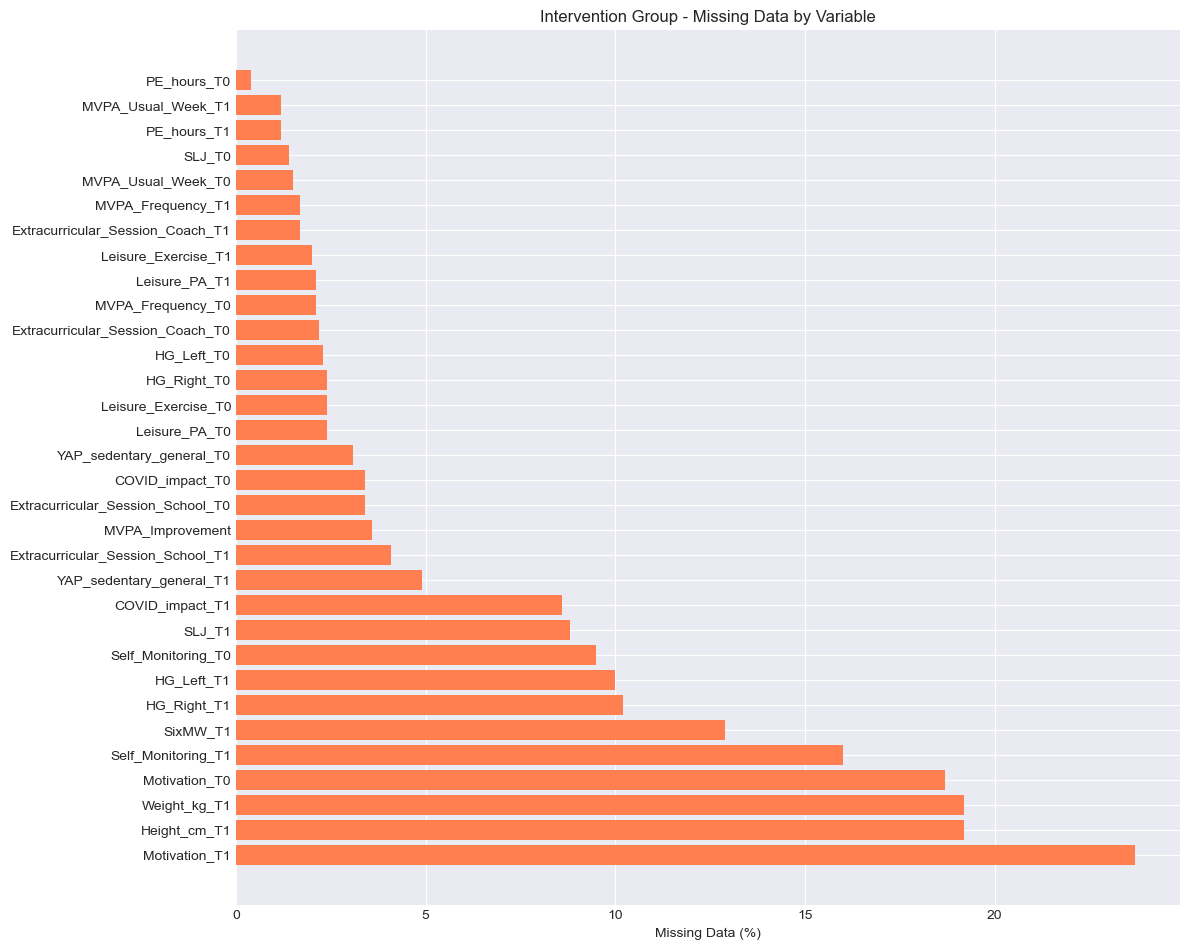


CONTROL GROUP - MISSING DATA SUMMARY

Variables with complete data: 6/38
Variables with missing data: 32/38

Missing Data Details:
                         Variable  Missing_Count  Missing_Pct
                    Motivation_T1            171         22.4
                       HG_Left_T0            170         22.3
                      HG_Right_T0            170         22.3
                    Motivation_T0            128         16.8
               Self_Monitoring_T1            117         15.3
                     Weight_kg_T1            114         14.9
                     Height_cm_T1            114         14.9
                         SixMW_T1            109         14.3
                       HG_Left_T1            102         13.4
                      HG_Right_T1             98         12.8
                           SLJ_T1             91         11.9
               Self_Monitoring_T0             53          6.9
         YAP_sedentary_general_T1             44          5.8


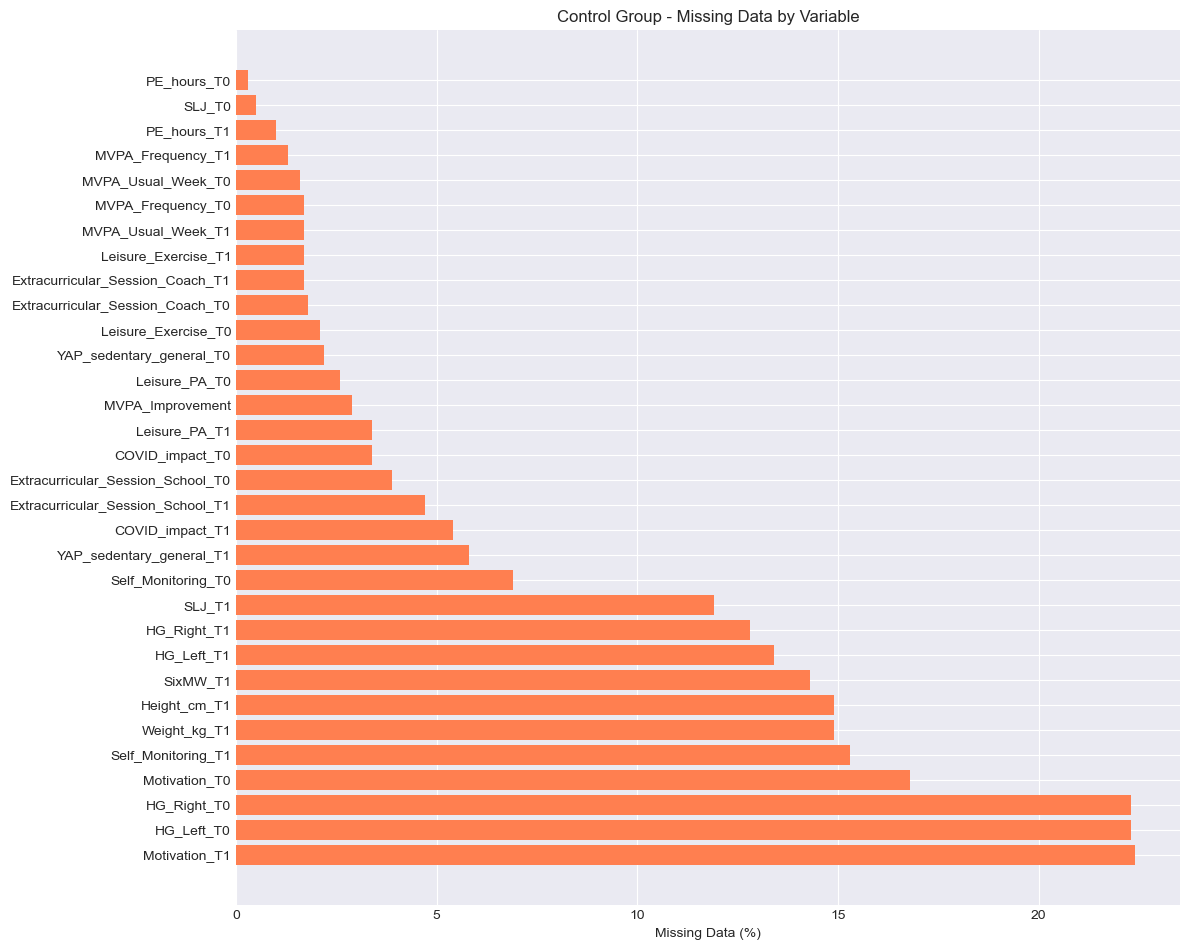

In [5]:
def analyze_missing_data(df, group_name):
    """Analyze and visualize missing data patterns."""
    missing_counts = df.isnull().sum()
    missing_pct = (missing_counts / len(df) * 100).round(1)
    
    # Create dataframe of missing data
    missing_df = pd.DataFrame({
        'Variable': missing_counts.index,
        'Missing_Count': missing_counts.values,
        'Missing_Pct': missing_pct.values
    })
    
    # Filter only variables with missing data
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Pct', ascending=False)
    
    print(f"\n{'='*70}")
    print(f"{group_name.upper()} GROUP - MISSING DATA SUMMARY")
    print(f"{'='*70}")
    print(f"\nVariables with complete data: {len(df.columns) - len(missing_df)}/{len(df.columns)}")
    print(f"Variables with missing data: {len(missing_df)}/{len(df.columns)}")
    
    if len(missing_df) > 0:
        print(f"\nMissing Data Details:")
        print(missing_df.to_string(index=False))
        
        # Visualize missing data
        if len(missing_df) > 0:
            plt.figure(figsize=(12, max(6, len(missing_df) * 0.3)))
            plt.barh(missing_df['Variable'], missing_df['Missing_Pct'], color='coral')
            plt.xlabel('Missing Data (%)')
            plt.title(f'{group_name} Group - Missing Data by Variable')
            plt.tight_layout()
            plt.show()
    else:
        print("\n✓ No missing data found!")
    
    return missing_df

missing_intervention = analyze_missing_data(df_intervention, "Intervention")
missing_control = analyze_missing_data(df_control, "Control")

## 3. Demographic Analysis

Visualizing the demographic characteristics of both groups.

In [6]:
# Create combined dataset for comparison
df_intervention['Group'] = 'Intervention'
df_control['Group'] = 'Control'
df_combined = pd.concat([df_intervention, df_control], ignore_index=True)

print(f"Combined dataset: {len(df_combined)} participants")

Combined dataset: 1770 participants


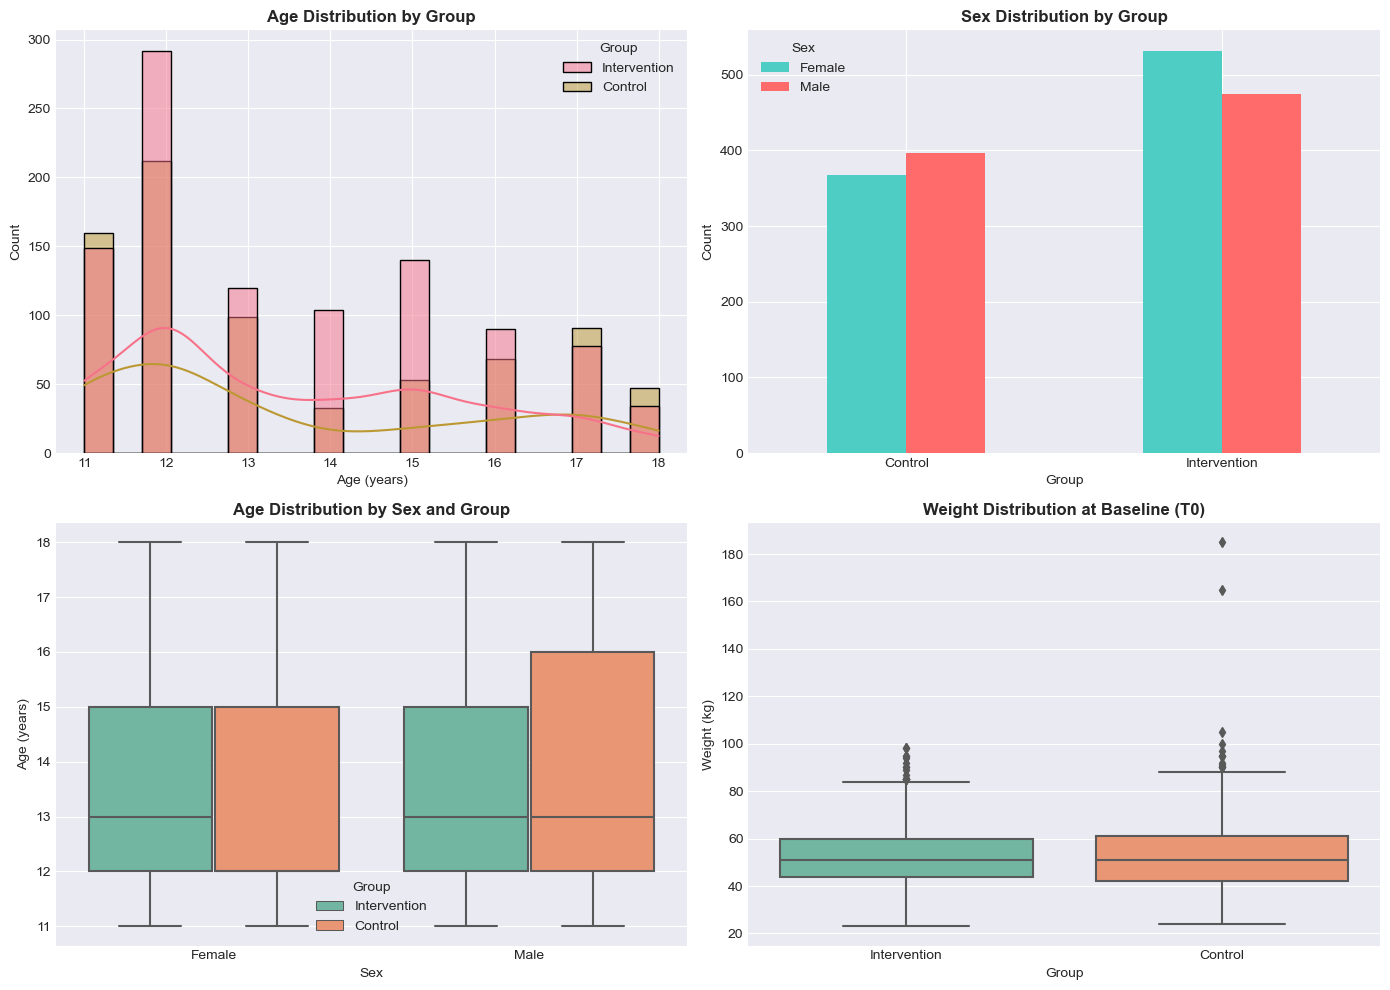

In [7]:
# Age and Sex Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Age Distribution by Group
sns.histplot(data=df_combined, x='Age', hue='Group', bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Group', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Count')

# 2. Sex Distribution by Group
# Create sex labels for better visualization
df_combined['Sex_Label'] = df_combined['Sex'].map({1: 'Male', 2: 'Female'})
sex_data = df_combined.groupby(['Group', 'Sex_Label']).size().unstack(fill_value=0)
sex_data.plot(kind='bar', ax=axes[0, 1], color=['#4ECDC4', '#FF6B6B'])
axes[0, 1].set_title('Sex Distribution by Group', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Group')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].legend(title='Sex')

# 3. Age by Sex
sns.boxplot(data=df_combined, x='Sex_Label', y='Age', hue='Group', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Age Distribution by Sex and Group', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Age (years)')

# 4. Weight Distribution
sns.boxplot(data=df_combined, x='Group', y='Weight_kg_T0', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Weight Distribution at Baseline (T0)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Group')
axes[1, 1].set_ylabel('Weight (kg)')

plt.tight_layout()
plt.show()

## 4. Physical Activity Analysis

### 4.1 MVPA Frequency Patterns

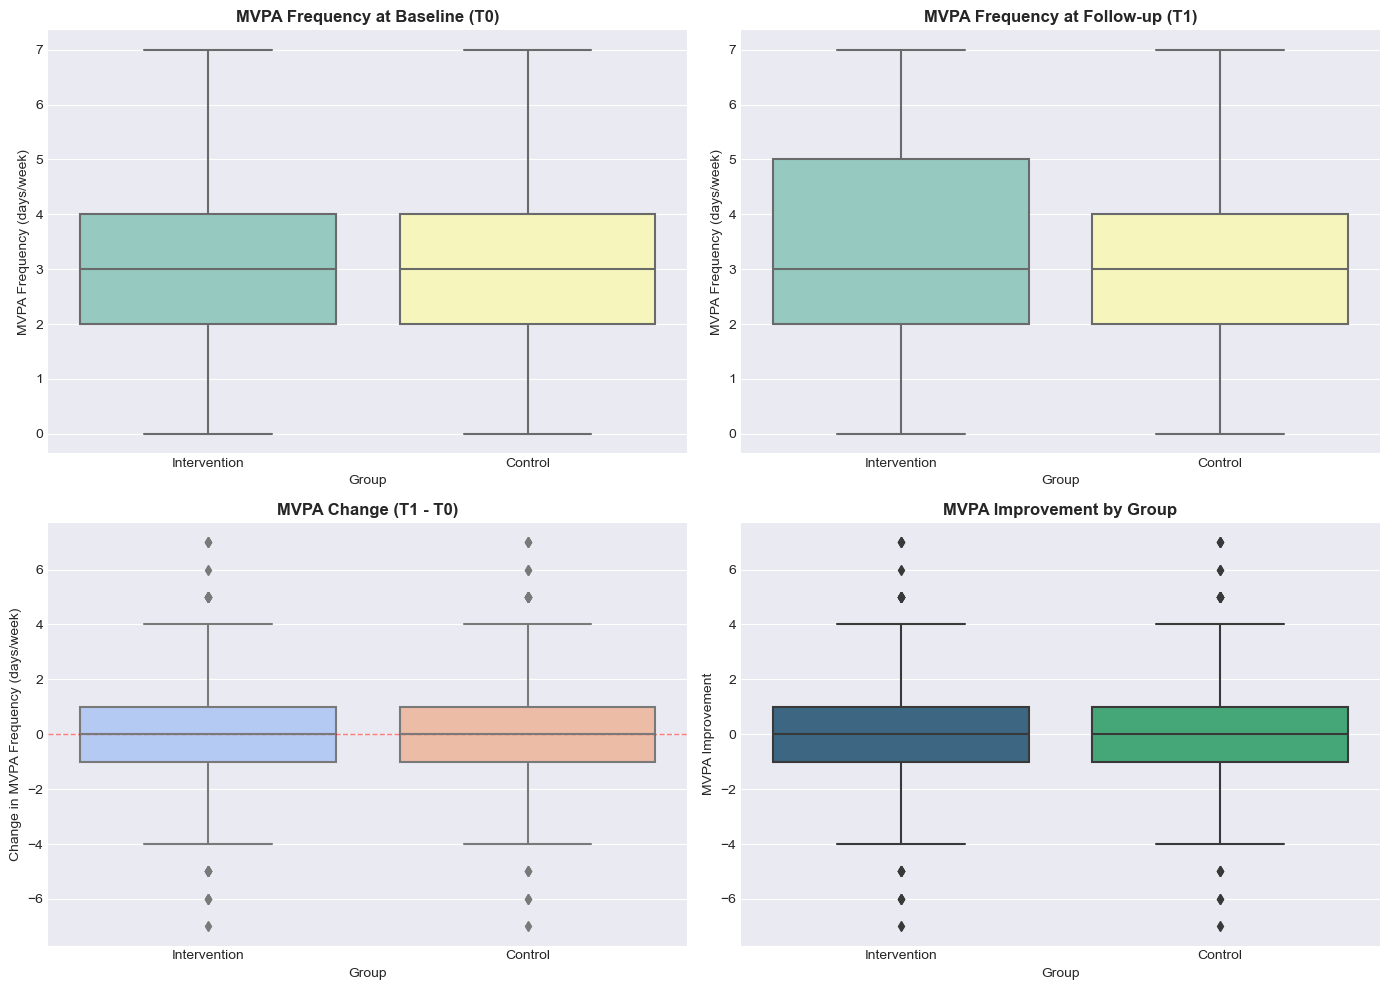


MVPA Frequency Statistics:

Intervention Group:
  T0 Mean: 3.10 ± 1.83
  T1 Mean: 3.41 ± 1.87
  Change: 0.31 ± 1.71

Control Group:
  T0 Mean: 2.96 ± 1.88
  T1 Mean: 3.20 ± 1.90
  Change: 0.25 ± 1.80


In [8]:
# MVPA Frequency Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. MVPA Frequency at T0 (Baseline)
sns.boxplot(data=df_combined, x='Group', y='MVPA_Frequency_T0', ax=axes[0, 0], palette='Set3')
axes[0, 0].set_title('MVPA Frequency at Baseline (T0)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('MVPA Frequency (days/week)')

# 2. MVPA Frequency at T1 (Follow-up)
sns.boxplot(data=df_combined, x='Group', y='MVPA_Frequency_T1', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('MVPA Frequency at Follow-up (T1)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('MVPA Frequency (days/week)')

# 3. MVPA Change (T1 - T0) by Group
df_combined['MVPA_Change'] = df_combined['MVPA_Frequency_T1'] - df_combined['MVPA_Frequency_T0']
sns.boxplot(data=df_combined, x='Group', y='MVPA_Change', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 0].set_title('MVPA Change (T1 - T0)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Change in MVPA Frequency (days/week)')

# 4. MVPA Improvement Distribution
if 'MVPA_Improvement' in df_combined.columns:
    mvpa_imp_data = df_combined[df_combined['MVPA_Improvement'].notna()]
    sns.boxplot(data=mvpa_imp_data, x='Group', y='MVPA_Improvement', ax=axes[1, 1], palette='viridis')
    axes[1, 1].set_title('MVPA Improvement by Group', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('MVPA Improvement')

plt.tight_layout()
plt.show()

# Print statistics
print("\nMVPA Frequency Statistics:")
print("=" * 70)
for group in ['Intervention', 'Control']:
    group_data = df_combined[df_combined['Group'] == group]
    print(f"\n{group} Group:")
    print(f"  T0 Mean: {group_data['MVPA_Frequency_T0'].mean():.2f} ± {group_data['MVPA_Frequency_T0'].std():.2f}")
    print(f"  T1 Mean: {group_data['MVPA_Frequency_T1'].mean():.2f} ± {group_data['MVPA_Frequency_T1'].std():.2f}")
    print(f"  Change: {group_data['MVPA_Change'].mean():.2f} ± {group_data['MVPA_Change'].std():.2f}")

### 4.2 Before-After Comparison (Paired Analysis)

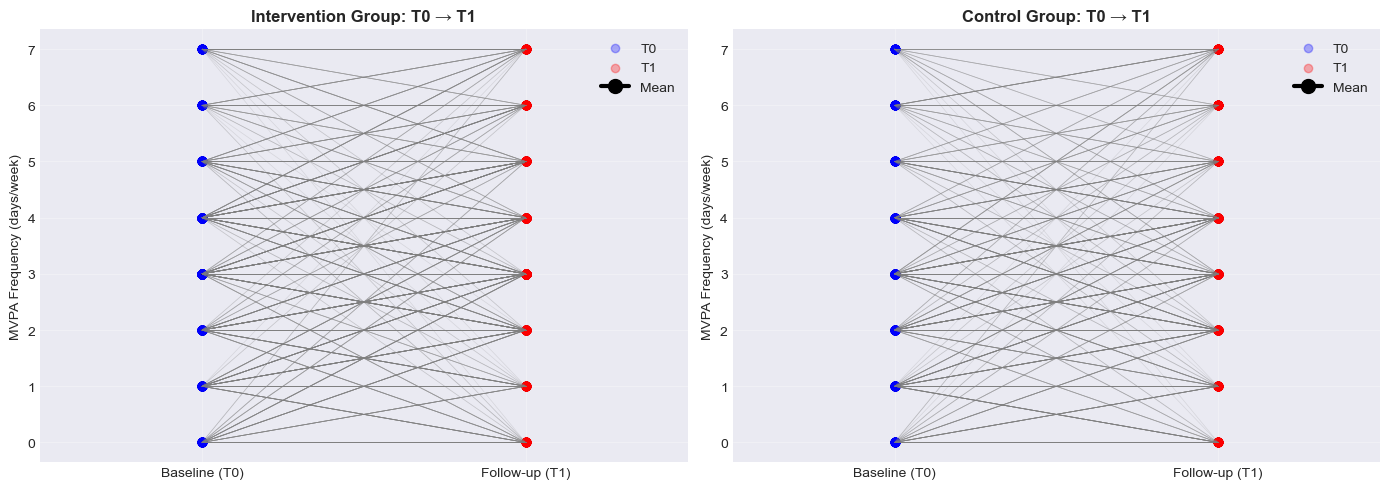


Paired t-tests for MVPA Frequency Change:

Intervention Group:
  t-statistic: nan
  p-value: nan
  Significant: No (α=0.05)

Control Group:
  t-statistic: nan
  p-value: nan
  Significant: No (α=0.05)


In [9]:
# Create before-after comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Intervention Group
intervention_t0 = df_intervention['MVPA_Frequency_T0'].values
intervention_t1 = df_intervention['MVPA_Frequency_T1'].values

axes[0].scatter([1]*len(intervention_t0), intervention_t0, alpha=0.3, color='blue', label='T0')
axes[0].scatter([2]*len(intervention_t1), intervention_t1, alpha=0.3, color='red', label='T1')
for i in range(len(intervention_t0)):
    axes[0].plot([1, 2], [intervention_t0[i], intervention_t1[i]], 'gray', alpha=0.2, linewidth=0.5)
axes[0].plot([1, 2], [intervention_t0.mean(), intervention_t1.mean()], 'black', linewidth=3, marker='o', markersize=10, label='Mean')
axes[0].set_xlim(0.5, 2.5)
axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(['Baseline (T0)', 'Follow-up (T1)'])
axes[0].set_ylabel('MVPA Frequency (days/week)')
axes[0].set_title('Intervention Group: T0 → T1', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Control Group
control_t0 = df_control['MVPA_Frequency_T0'].values
control_t1 = df_control['MVPA_Frequency_T1'].values

axes[1].scatter([1]*len(control_t0), control_t0, alpha=0.3, color='blue', label='T0')
axes[1].scatter([2]*len(control_t1), control_t1, alpha=0.3, color='red', label='T1')
for i in range(len(control_t0)):
    axes[1].plot([1, 2], [control_t0[i], control_t1[i]], 'gray', alpha=0.2, linewidth=0.5)
axes[1].plot([1, 2], [control_t0.mean(), control_t1.mean()], 'black', linewidth=3, marker='o', markersize=10, label='Mean')
axes[1].set_xlim(0.5, 2.5)
axes[1].set_xticks([1, 2])
axes[1].set_xticklabels(['Baseline (T0)', 'Follow-up (T1)'])
axes[1].set_ylabel('MVPA Frequency (days/week)')
axes[1].set_title('Control Group: T0 → T1', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Perform paired t-tests
print("\nPaired t-tests for MVPA Frequency Change:")
print("=" * 70)

# Intervention group
t_stat_int, p_val_int = stats.ttest_rel(df_intervention['MVPA_Frequency_T1'], df_intervention['MVPA_Frequency_T0'])
print(f"\nIntervention Group:")
print(f"  t-statistic: {t_stat_int:.3f}")
print(f"  p-value: {p_val_int:.4f}")
print(f"  Significant: {'Yes' if p_val_int < 0.05 else 'No'} (α=0.05)")

# Control group
t_stat_ctrl, p_val_ctrl = stats.ttest_rel(df_control['MVPA_Frequency_T1'], df_control['MVPA_Frequency_T0'])
print(f"\nControl Group:")
print(f"  t-statistic: {t_stat_ctrl:.3f}")
print(f"  p-value: {p_val_ctrl:.4f}")
print(f"  Significant: {'Yes' if p_val_ctrl < 0.05 else 'No'} (α=0.05)")

### 4.3 Leisure Activities and Other PA Measures

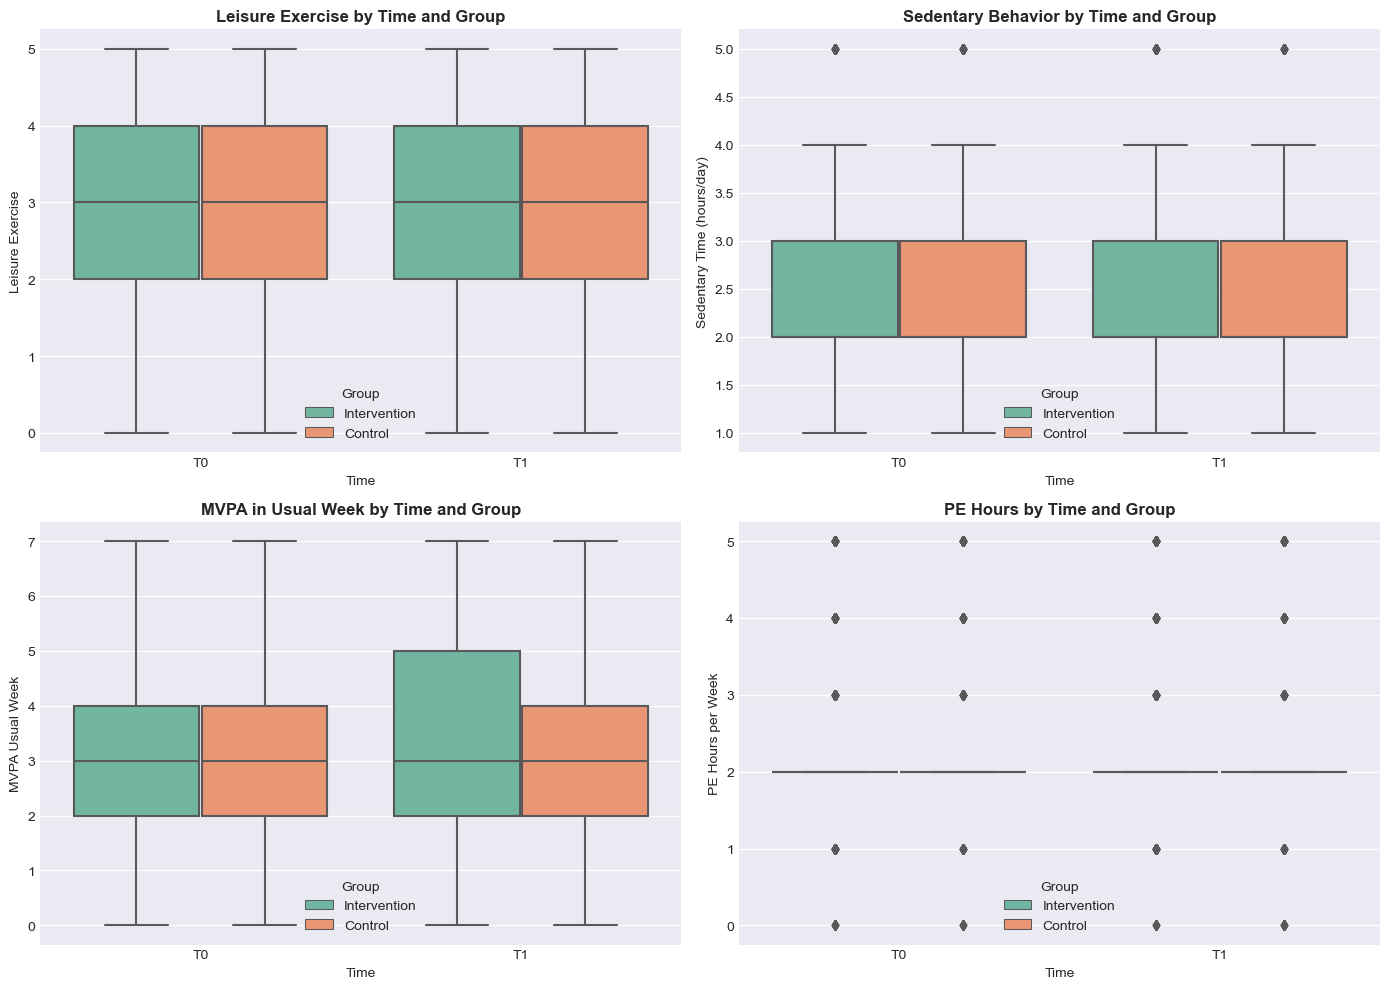

In [10]:
# Leisure activity and sedentary behavior analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Leisure Exercise at T0 and T1
leisure_data = df_combined.melt(id_vars=['Group'], 
                                 value_vars=['Leisure_Exercise_T0', 'Leisure_Exercise_T1'],
                                 var_name='Time', value_name='Leisure_Exercise')
leisure_data['Time'] = leisure_data['Time'].map({'Leisure_Exercise_T0': 'T0', 'Leisure_Exercise_T1': 'T1'})
sns.boxplot(data=leisure_data, x='Time', y='Leisure_Exercise', hue='Group', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Leisure Exercise by Time and Group', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Leisure Exercise')

# 2. Sedentary Behavior (YAP)
sedentary_data = df_combined.melt(id_vars=['Group'], 
                                   value_vars=['YAP_sedentary_general_T0', 'YAP_sedentary_general_T1'],
                                   var_name='Time', value_name='Sedentary_Time')
sedentary_data['Time'] = sedentary_data['Time'].map({'YAP_sedentary_general_T0': 'T0', 'YAP_sedentary_general_T1': 'T1'})
sns.boxplot(data=sedentary_data, x='Time', y='Sedentary_Time', hue='Group', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Sedentary Behavior by Time and Group', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Sedentary Time (hours/day)')

# 3. MVPA Usual Week
mvpa_usual_data = df_combined.melt(id_vars=['Group'], 
                                    value_vars=['MVPA_Usual_Week_T0', 'MVPA_Usual_Week_T1'],
                                    var_name='Time', value_name='MVPA_Usual_Week')
mvpa_usual_data['Time'] = mvpa_usual_data['Time'].map({'MVPA_Usual_Week_T0': 'T0', 'MVPA_Usual_Week_T1': 'T1'})
sns.boxplot(data=mvpa_usual_data, x='Time', y='MVPA_Usual_Week', hue='Group', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('MVPA in Usual Week by Time and Group', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('MVPA Usual Week')

# 4. PE Hours
pe_data = df_combined.melt(id_vars=['Group'], 
                            value_vars=['PE_hours_T0', 'PE_hours_T1'],
                            var_name='Time', value_name='PE_hours')
pe_data['Time'] = pe_data['Time'].map({'PE_hours_T0': 'T0', 'PE_hours_T1': 'T1'})
sns.boxplot(data=pe_data, x='Time', y='PE_hours', hue='Group', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('PE Hours by Time and Group', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('PE Hours per Week')

plt.tight_layout()
plt.show()

## 5. Psychological Variables

### 5.1 Motivation Analysis

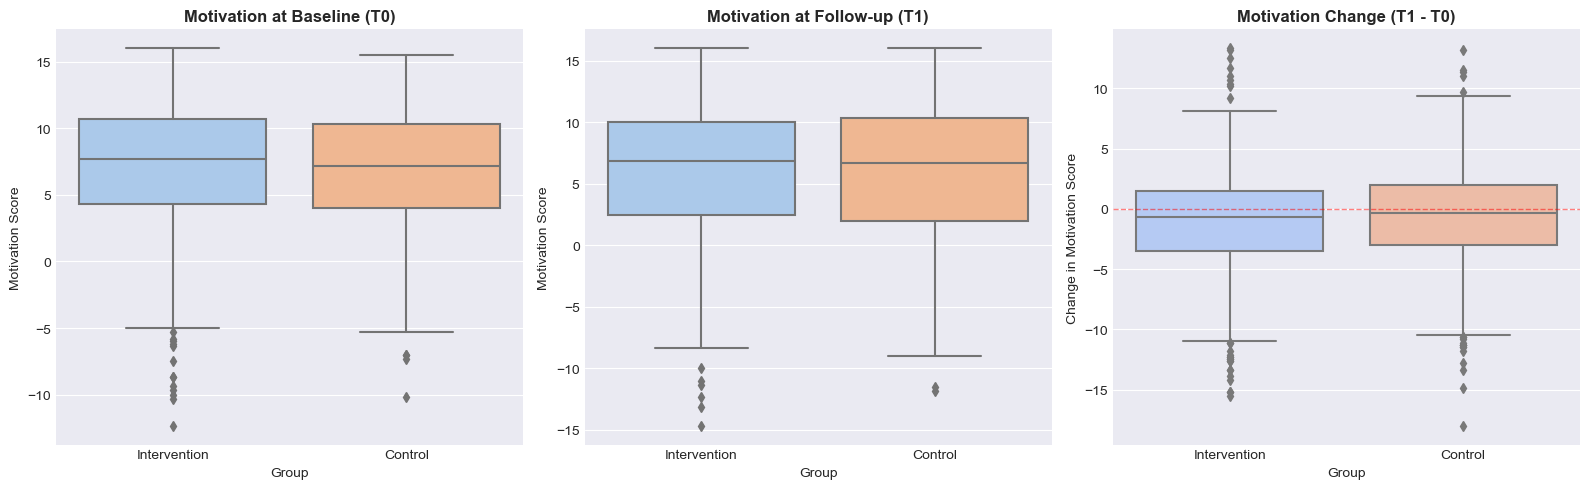


Motivation Statistics:

Intervention Group:
  T0 Mean: 7.08 ± 4.60
  T1 Mean: 6.18 ± 5.20
  Change: -1.05 ± 4.31

Control Group:
  T0 Mean: 6.80 ± 4.61
  T1 Mean: 6.19 ± 5.33
  Change: -0.72 ± 4.33


In [11]:
# Motivation analysis
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Motivation at T0
sns.boxplot(data=df_combined, x='Group', y='Motivation_T0', ax=axes[0], palette='pastel')
axes[0].set_title('Motivation at Baseline (T0)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Motivation Score')

# 2. Motivation at T1
sns.boxplot(data=df_combined, x='Group', y='Motivation_T1', ax=axes[1], palette='pastel')
axes[1].set_title('Motivation at Follow-up (T1)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Motivation Score')

# 3. Motivation Change
df_combined['Motivation_Change'] = df_combined['Motivation_T1'] - df_combined['Motivation_T0']
sns.boxplot(data=df_combined, x='Group', y='Motivation_Change', ax=axes[2], palette='coolwarm')
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[2].set_title('Motivation Change (T1 - T0)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Change in Motivation Score')

plt.tight_layout()
plt.show()

# Print statistics
print("\nMotivation Statistics:")
print("=" * 70)
for group in ['Intervention', 'Control']:
    group_data = df_combined[df_combined['Group'] == group]
    print(f"\n{group} Group:")
    print(f"  T0 Mean: {group_data['Motivation_T0'].mean():.2f} ± {group_data['Motivation_T0'].std():.2f}")
    print(f"  T1 Mean: {group_data['Motivation_T1'].mean():.2f} ± {group_data['Motivation_T1'].std():.2f}")
    print(f"  Change: {group_data['Motivation_Change'].mean():.2f} ± {group_data['Motivation_Change'].std():.2f}")

### 5.2 Self-Monitoring Analysis

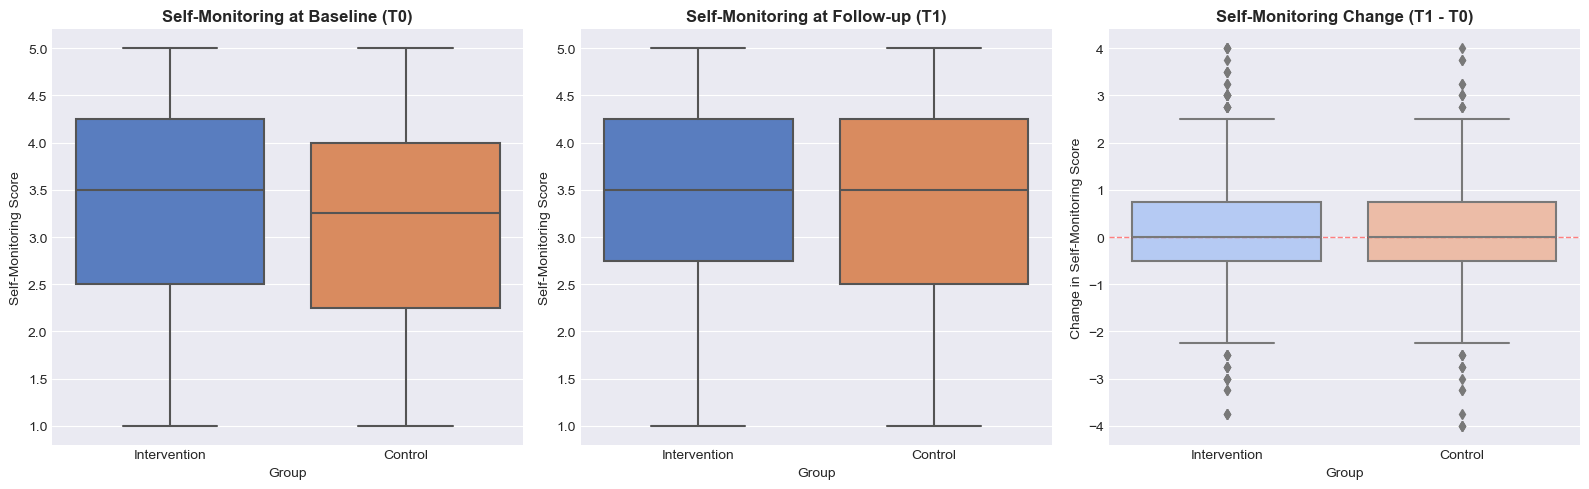


Self-Monitoring Statistics:

Intervention Group:
  T0 Mean: 3.29 ± 1.21
  T1 Mean: 3.35 ± 1.17
  Change: 0.08 ± 1.19

Control Group:
  T0 Mean: 3.17 ± 1.23
  T1 Mean: 3.30 ± 1.21
  Change: 0.10 ± 1.10


In [12]:
# Self-monitoring analysis
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Self-Monitoring at T0
sns.boxplot(data=df_combined, x='Group', y='Self_Monitoring_T0', ax=axes[0], palette='muted')
axes[0].set_title('Self-Monitoring at Baseline (T0)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Self-Monitoring Score')

# 2. Self-Monitoring at T1
sns.boxplot(data=df_combined, x='Group', y='Self_Monitoring_T1', ax=axes[1], palette='muted')
axes[1].set_title('Self-Monitoring at Follow-up (T1)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Self-Monitoring Score')

# 3. Self-Monitoring Change
df_combined['Self_Monitoring_Change'] = df_combined['Self_Monitoring_T1'] - df_combined['Self_Monitoring_T0']
sns.boxplot(data=df_combined, x='Group', y='Self_Monitoring_Change', ax=axes[2], palette='coolwarm')
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[2].set_title('Self-Monitoring Change (T1 - T0)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Change in Self-Monitoring Score')

plt.tight_layout()
plt.show()

# Print statistics
print("\nSelf-Monitoring Statistics:")
print("=" * 70)
for group in ['Intervention', 'Control']:
    group_data = df_combined[df_combined['Group'] == group]
    print(f"\n{group} Group:")
    print(f"  T0 Mean: {group_data['Self_Monitoring_T0'].mean():.2f} ± {group_data['Self_Monitoring_T0'].std():.2f}")
    print(f"  T1 Mean: {group_data['Self_Monitoring_T1'].mean():.2f} ± {group_data['Self_Monitoring_T1'].std():.2f}")
    print(f"  Change: {group_data['Self_Monitoring_Change'].mean():.2f} ± {group_data['Self_Monitoring_Change'].std():.2f}")

## 6. Fitness Outcomes

### 6.1 Six-Minute Walk Test (6MWT)

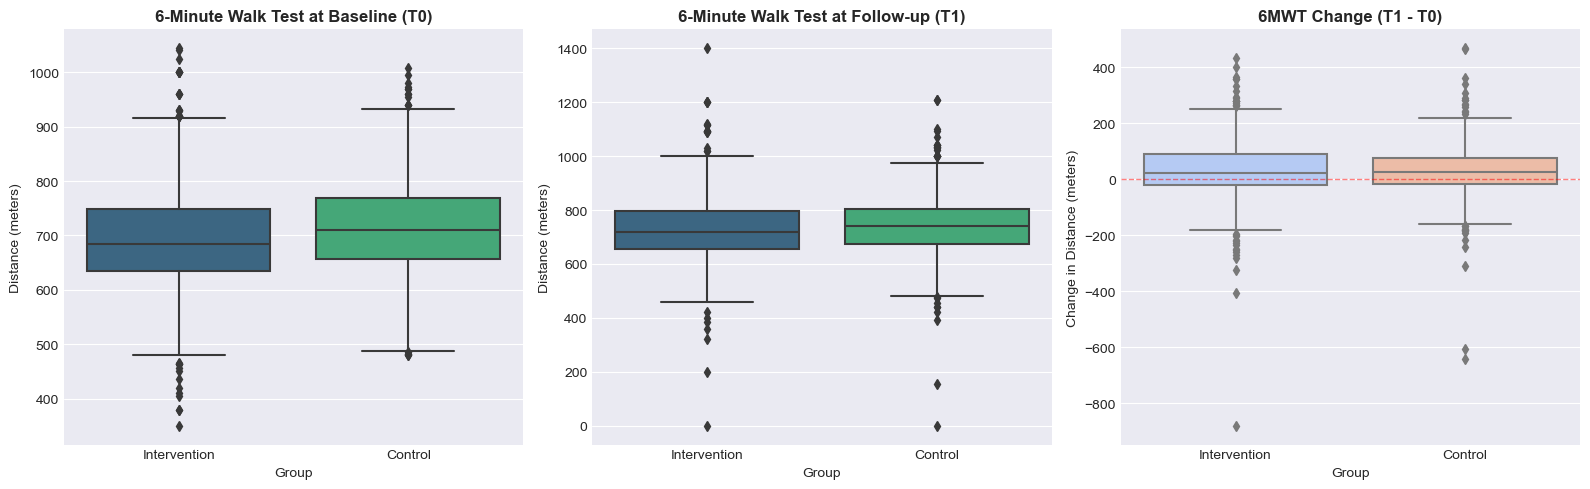

In [13]:
# Six-Minute Walk Test analysis
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. 6MWT at T0
sns.boxplot(data=df_combined, x='Group', y='SixMW_T0', ax=axes[0], palette='viridis')
axes[0].set_title('6-Minute Walk Test at Baseline (T0)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Distance (meters)')

# 2. 6MWT at T1
sixmw_t1_data = df_combined[df_combined['SixMW_T1'].notna()]
sns.boxplot(data=sixmw_t1_data, x='Group', y='SixMW_T1', ax=axes[1], palette='viridis')
axes[1].set_title('6-Minute Walk Test at Follow-up (T1)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Distance (meters)')

# 3. 6MWT Change
df_combined['SixMW_Change'] = df_combined['SixMW_T1'] - df_combined['SixMW_T0']
sixmw_change_data = df_combined[df_combined['SixMW_Change'].notna()]
sns.boxplot(data=sixmw_change_data, x='Group', y='SixMW_Change', ax=axes[2], palette='coolwarm')
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[2].set_title('6MWT Change (T1 - T0)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Change in Distance (meters)')

plt.tight_layout()
plt.show()

### 6.2 Other Fitness Tests

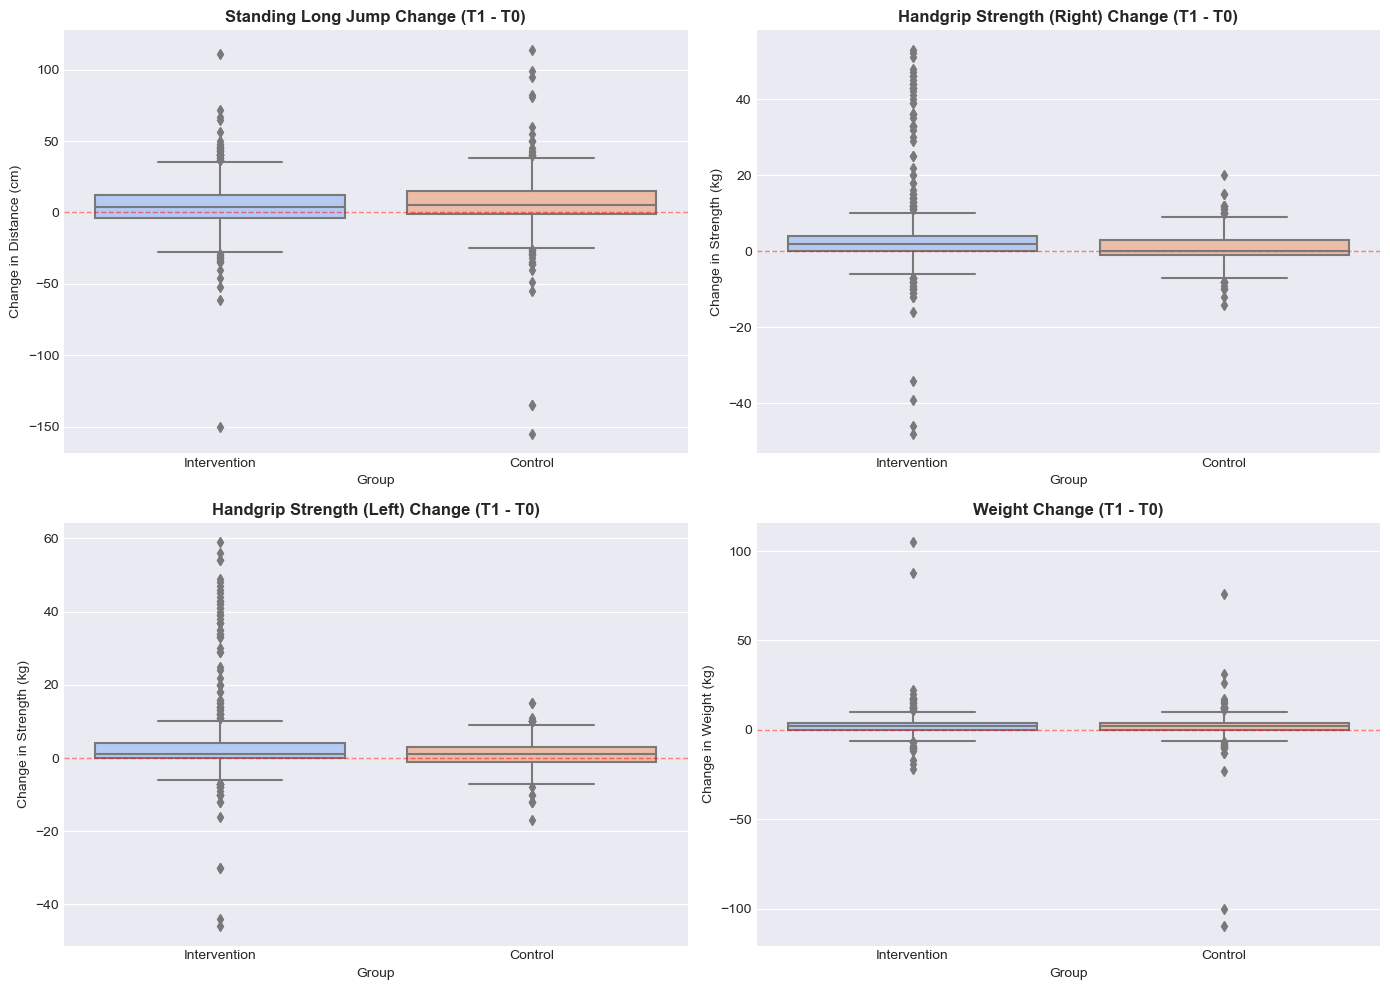

In [14]:
# Standing Long Jump and Handgrip Strength
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Standing Long Jump Change
df_combined['SLJ_Change'] = df_combined['SLJ_T1'] - df_combined['SLJ_T0']
slj_change_data = df_combined[df_combined['SLJ_Change'].notna()]
sns.boxplot(data=slj_change_data, x='Group', y='SLJ_Change', ax=axes[0, 0], palette='coolwarm')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[0, 0].set_title('Standing Long Jump Change (T1 - T0)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Change in Distance (cm)')

# 2. Handgrip Right Change
df_combined['HG_Right_Change'] = df_combined['HG_Right_T1'] - df_combined['HG_Right_T0']
hg_right_change_data = df_combined[df_combined['HG_Right_Change'].notna()]
sns.boxplot(data=hg_right_change_data, x='Group', y='HG_Right_Change', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[0, 1].set_title('Handgrip Strength (Right) Change (T1 - T0)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Change in Strength (kg)')

# 3. Handgrip Left Change
df_combined['HG_Left_Change'] = df_combined['HG_Left_T1'] - df_combined['HG_Left_T0']
hg_left_change_data = df_combined[df_combined['HG_Left_Change'].notna()]
sns.boxplot(data=hg_left_change_data, x='Group', y='HG_Left_Change', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 0].set_title('Handgrip Strength (Left) Change (T1 - T0)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Change in Strength (kg)')

# 4. Weight Change
df_combined['Weight_Change'] = df_combined['Weight_kg_T1'] - df_combined['Weight_kg_T0']
weight_change_data = df_combined[df_combined['Weight_Change'].notna()]
sns.boxplot(data=weight_change_data, x='Group', y='Weight_Change', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 1].set_title('Weight Change (T1 - T0)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Change in Weight (kg)')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

### 7.1 Correlation Matrix for Intervention Group

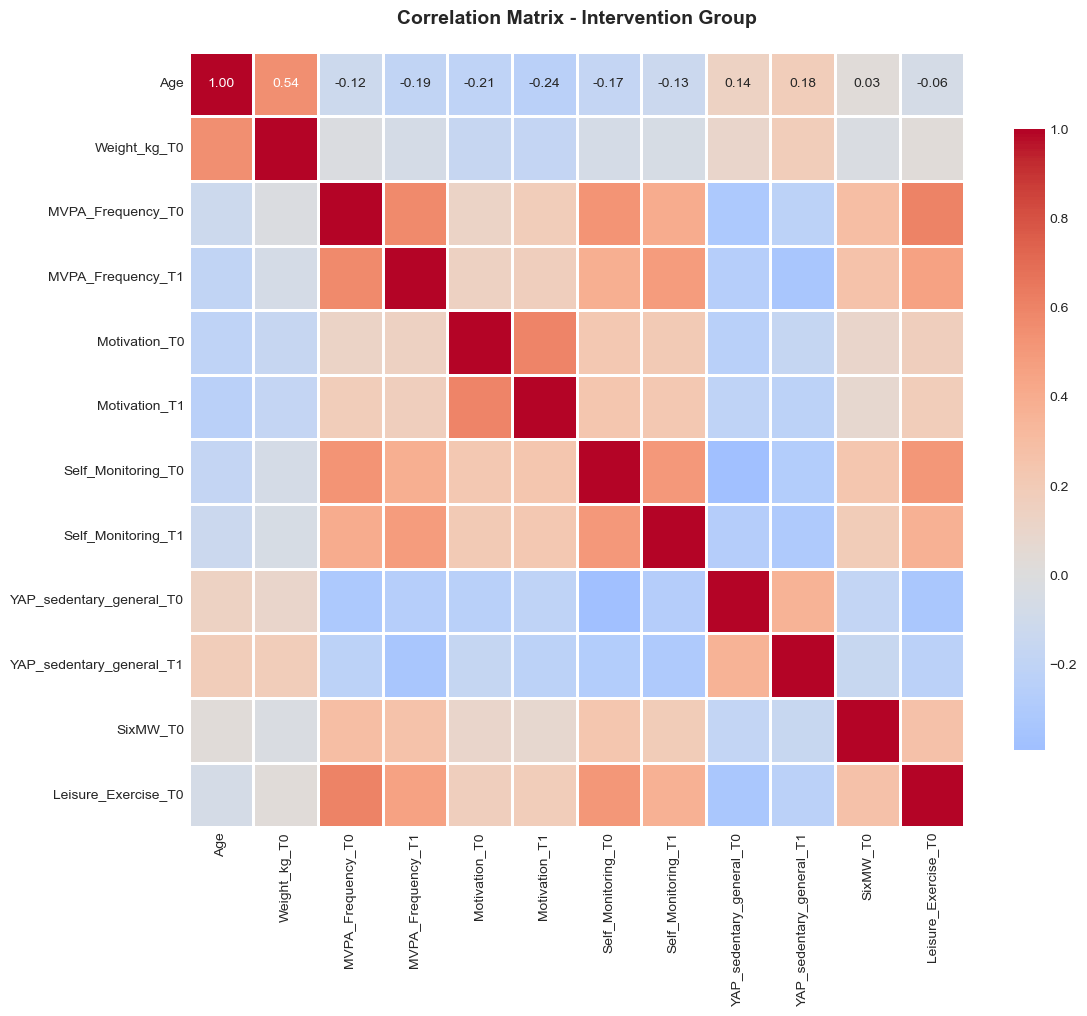

In [15]:
# Select key variables for correlation analysis
key_vars = [
    'Age', 'Weight_kg_T0', 'MVPA_Frequency_T0', 'MVPA_Frequency_T1', 
    'Motivation_T0', 'Motivation_T1', 'Self_Monitoring_T0', 'Self_Monitoring_T1',
    'YAP_sedentary_general_T0', 'YAP_sedentary_general_T1',
    'SixMW_T0', 'Leisure_Exercise_T0'
]

# Create correlation matrix for intervention group
corr_intervention = df_intervention[key_vars].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_intervention, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Intervention Group', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 7.2 Key Relationships

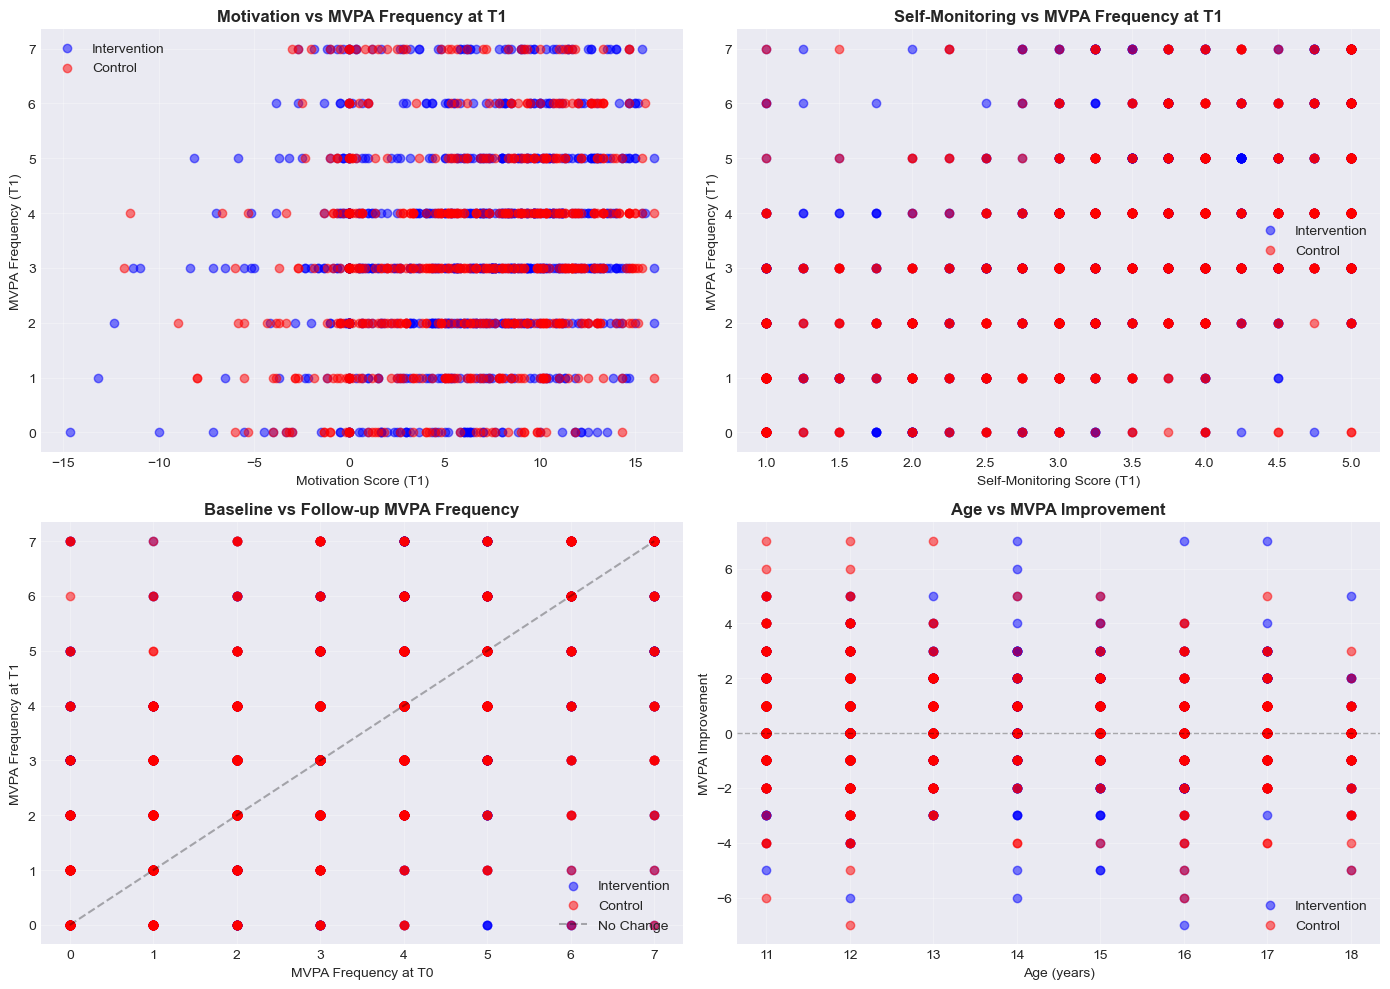

In [16]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Motivation vs MVPA Frequency at T1
for group, color in [('Intervention', 'blue'), ('Control', 'red')]:
    group_data = df_combined[df_combined['Group'] == group]
    axes[0, 0].scatter(group_data['Motivation_T1'], group_data['MVPA_Frequency_T1'], 
                       alpha=0.5, label=group, color=color)
axes[0, 0].set_xlabel('Motivation Score (T1)')
axes[0, 0].set_ylabel('MVPA Frequency (T1)')
axes[0, 0].set_title('Motivation vs MVPA Frequency at T1', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Self-Monitoring vs MVPA Frequency at T1
for group, color in [('Intervention', 'blue'), ('Control', 'red')]:
    group_data = df_combined[df_combined['Group'] == group]
    axes[0, 1].scatter(group_data['Self_Monitoring_T1'], group_data['MVPA_Frequency_T1'], 
                       alpha=0.5, label=group, color=color)
axes[0, 1].set_xlabel('Self-Monitoring Score (T1)')
axes[0, 1].set_ylabel('MVPA Frequency (T1)')
axes[0, 1].set_title('Self-Monitoring vs MVPA Frequency at T1', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Baseline MVPA vs Follow-up MVPA
for group, color in [('Intervention', 'blue'), ('Control', 'red')]:
    group_data = df_combined[df_combined['Group'] == group]
    axes[1, 0].scatter(group_data['MVPA_Frequency_T0'], group_data['MVPA_Frequency_T1'], 
                       alpha=0.5, label=group, color=color)
# Add diagonal line (no change)
max_val = max(df_combined['MVPA_Frequency_T0'].max(), df_combined['MVPA_Frequency_T1'].max())
axes[1, 0].plot([0, max_val], [0, max_val], 'k--', alpha=0.3, label='No Change')
axes[1, 0].set_xlabel('MVPA Frequency at T0')
axes[1, 0].set_ylabel('MVPA Frequency at T1')
axes[1, 0].set_title('Baseline vs Follow-up MVPA Frequency', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Age vs MVPA Improvement
mvpa_imp_data = df_combined[df_combined['MVPA_Improvement'].notna()]
for group, color in [('Intervention', 'blue'), ('Control', 'red')]:
    group_data = mvpa_imp_data[mvpa_imp_data['Group'] == group]
    axes[1, 1].scatter(group_data['Age'], group_data['MVPA_Improvement'], 
                       alpha=0.5, label=group, color=color)
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.3)
axes[1, 1].set_xlabel('Age (years)')
axes[1, 1].set_ylabel('MVPA Improvement')
axes[1, 1].set_title('Age vs MVPA Improvement', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Summary Statistics Table

In [17]:
# Create comprehensive summary statistics table
def create_summary_table(df, group_name):
    """Create a summary statistics table for key variables."""
    
    summary_vars = {
        'Demographics': ['Age', 'Weight_kg_T0'],
        'Physical Activity': ['MVPA_Frequency_T0', 'MVPA_Frequency_T1', 'Leisure_Exercise_T0', 'Leisure_Exercise_T1'],
        'Psychological': ['Motivation_T0', 'Motivation_T1', 'Self_Monitoring_T0', 'Self_Monitoring_T1'],
        'Sedentary': ['YAP_sedentary_general_T0', 'YAP_sedentary_general_T1'],
        'Fitness': ['SixMW_T0', 'SixMW_T1']
    }
    
    results = []
    
    for category, vars in summary_vars.items():
        for var in vars:
            if var in df.columns:
                data = df[var].dropna()
                results.append({
                    'Category': category,
                    'Variable': var,
                    'N': len(data),
                    'Mean': f"{data.mean():.2f}",
                    'SD': f"{data.std():.2f}",
                    'Min': f"{data.min():.2f}",
                    'Max': f"{data.max():.2f}"
                })
    
    summary_df = pd.DataFrame(results)
    
    print(f"\n{'='*80}")
    print(f"{group_name.upper()} GROUP - SUMMARY STATISTICS")
    print(f"{'='*80}")
    print(summary_df.to_string(index=False))
    
    return summary_df

summary_intervention = create_summary_table(df_intervention, "Intervention")
summary_control = create_summary_table(df_control, "Control")


INTERVENTION GROUP - SUMMARY STATISTICS
         Category                 Variable    N   Mean     SD    Min     Max
     Demographics                      Age 1007  13.54   2.03  11.00   18.00
     Demographics             Weight_kg_T0 1007  52.07  12.28  23.00   98.00
Physical Activity        MVPA_Frequency_T0  986   3.10   1.83   0.00    7.00
Physical Activity        MVPA_Frequency_T1  990   3.41   1.87   0.00    7.00
Physical Activity      Leisure_Exercise_T0  983   2.88   1.55   0.00    5.00
Physical Activity      Leisure_Exercise_T1  987   3.09   1.48   0.00    5.00
    Psychological            Motivation_T0  819   7.08   4.60 -12.33   16.00
    Psychological            Motivation_T1  768   6.18   5.20 -14.67   16.00
    Psychological       Self_Monitoring_T0  911   3.29   1.21   1.00    5.00
    Psychological       Self_Monitoring_T1  846   3.35   1.17   1.00    5.00
        Sedentary YAP_sedentary_general_T0  976   2.50   0.97   1.00    5.00
        Sedentary YAP_sedentary_gen

## 9. Effect Size Analysis

Calculate Cohen's d effect sizes for key intervention effects.

In [18]:
def cohens_d(x, y):
    """Calculate Cohen's d effect size."""
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)

# Calculate effect sizes for key variables
print("\n" + "="*80)
print("EFFECT SIZES (Cohen's d) - Intervention vs Control")
print("="*80)
print("\nInterpretation: Small (0.2), Medium (0.5), Large (0.8)\n")

effect_size_vars = [
    ('MVPA_Change', 'MVPA Frequency Change'),
    ('Motivation_Change', 'Motivation Change'),
    ('Self_Monitoring_Change', 'Self-Monitoring Change'),
]

results = []
for var, label in effect_size_vars:
    if var in df_combined.columns:
        int_data = df_intervention[var].dropna()
        ctrl_data = df_control[var].dropna()
        
        if len(int_data) > 0 and len(ctrl_data) > 0:
            d = cohens_d(int_data, ctrl_data)
            
            # Interpret effect size
            if abs(d) < 0.2:
                interpretation = "Negligible"
            elif abs(d) < 0.5:
                interpretation = "Small"
            elif abs(d) < 0.8:
                interpretation = "Medium"
            else:
                interpretation = "Large"
            
            results.append({
                'Variable': label,
                'Cohen\'s d': f"{d:.3f}",
                'Interpretation': interpretation,
                'Int. Mean': f"{int_data.mean():.2f}",
                'Ctrl. Mean': f"{ctrl_data.mean():.2f}"
            })

effect_size_df = pd.DataFrame(results)
print(effect_size_df.to_string(index=False))


EFFECT SIZES (Cohen's d) - Intervention vs Control

Interpretation: Small (0.2), Medium (0.5), Large (0.8)



KeyError: 'MVPA_Change'

## 10. Key Findings Summary

Summarize the main findings from the exploratory data analysis.

In [ ]:
print("\n" + "="*80)
print("KEY FINDINGS SUMMARY")
print("="*80)

print("\n1. SAMPLE CHARACTERISTICS:")
print(f"   - Total participants: {len(df_combined)}")
print(f"   - Intervention group: {len(df_intervention)} ({len(df_intervention)/len(df_combined)*100:.1f}%)")
print(f"   - Control group: {len(df_control)} ({len(df_control)/len(df_combined)*100:.1f}%)")
print(f"   - Mean age: {df_combined['Age'].mean():.1f} ± {df_combined['Age'].std():.1f} years")

print("\n2. MVPA FREQUENCY CHANGES:")
int_change = df_intervention['MVPA_Change'].mean()
ctrl_change = df_control['MVPA_Change'].mean()
print(f"   - Intervention group change: {int_change:+.2f} days/week")
print(f"   - Control group change: {ctrl_change:+.2f} days/week")
print(f"   - Difference: {int_change - ctrl_change:.2f} days/week")

print("\n3. MOTIVATION CHANGES:")
int_motiv_change = df_intervention['Motivation_Change'].mean()
ctrl_motiv_change = df_control['Motivation_Change'].mean()
print(f"   - Intervention group change: {int_motiv_change:+.2f}")
print(f"   - Control group change: {ctrl_motiv_change:+.2f}")
print(f"   - Difference: {int_motiv_change - ctrl_motiv_change:.2f}")

print("\n4. SELF-MONITORING CHANGES:")
int_sm_change = df_intervention['Self_Monitoring_Change'].mean()
ctrl_sm_change = df_control['Self_Monitoring_Change'].mean()
print(f"   - Intervention group change: {int_sm_change:+.2f}")
print(f"   - Control group change: {ctrl_sm_change:+.2f}")
print(f"   - Difference: {int_sm_change - ctrl_sm_change:.2f}")

print("\n5. DATA QUALITY:")
print(f"   - Variables with complete data: {(df_combined.isnull().sum() == 0).sum()}/{len(df_combined.columns)}")
print(f"   - Variables with missing data: {(df_combined.isnull().sum() > 0).sum()}/{len(df_combined.columns)}")

print("\n" + "="*80)
print("EXPLORATION COMPLETE")
print("="*80)